## Data set

The original dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

### business plan


Our goal is to discover hidden patterns in the data, which might be useful for 
distinguishing genuine work absences from fraudulent ones.

the following topics will be addressed:

• Introduction to probability, conditional probability, and Bayes' theorem

• Kolmogorov-Smirnov tests for equality of probability distributions

• Box-Cox and Yeo-Johnson transformations

We will apply these techniques to our analysis as we try to identify the main drivers 
for absenteeism.

## understand Data

In [1]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import data 
data = pd.read_csv('Absenteeism_at_work.csv', sep=";")

In [3]:
#show data 
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
"""
print dimensionality of the data, columns, types and missing values
"""
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:40} | type: {str(data[col].dtype):10} | missing values: {data[col].isna().sum():5}")

Data dimension: (740, 21)
Column: ID                                       | type: int64      | missing values:     0
Column: Reason for absence                       | type: int64      | missing values:     0
Column: Month of absence                         | type: int64      | missing values:     0
Column: Day of the week                          | type: int64      | missing values:     0
Column: Seasons                                  | type: int64      | missing values:     0
Column: Transportation expense                   | type: int64      | missing values:     0
Column: Distance from Residence to Work          | type: int64      | missing values:     0
Column: Service time                             | type: int64      | missing values:     0
Column: Age                                      | type: int64      | missing values:     0
Column: Work load Average/day                    | type: float64    | missing values:     0
Column: Hit target                               | typ

As we can see from these 21 columns, only one (Work Load Average/day) 
does not contain integer values. 

Since no missing values are present in the data, we can consider it quite clean.

In [6]:
# compute statistics on numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


some of the columns, such as Month of absence, Day of the week, 
Seasons, Education, Disciplinary failure, Social drinker, and 
Social smoker, are encoding categorical values. So, we can back-transform the 
numerical values to their original categories so that we have better plotting features.

In [7]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March",  4: "April", 5: "May", 6: "June", 7: "July",
                  8: "August", 9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}
day_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

in the Month of absence column, a 0 value is present, which is encoded as Unknown as no month corresponds to 0

In [8]:
# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"].apply(lambda x:month_encoding[x])
preprocessed_data["Day of the week"]=preprocessed_data["Day of the week"].apply(lambda x:day_encoding[x])
preprocessed_data["Seasons"]=preprocessed_data["Seasons"].apply(lambda x: season_encoding[x])
preprocessed_data["Education"]=preprocessed_data["Education"].apply(lambda x: education_encoding[x])
preprocessed_data["Social drinker"]=preprocessed_data["Social drinker"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Social smoker"]=preprocessed_data["Social smoker"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Disciplinary failure"]=preprocessed_data["Disciplinary failure"].apply(lambda x: yes_no_encoding[x])
                                                                                    

In [9]:
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


Based on the description of the data, the Reason for absence column contains 
information about the absence, which is encoded based on the International Code
of Diseases (ICD)

only values 1 to 21 represent ICD encoding; values 22 to 28 are separate 
reasons, which do not represent a disease, while value 0 is not defined—hence the 
encoded reason Unknown

 ## Identifying Reasons for Absence

In [10]:
"""
define function, which checks if the provided integer value 
is contained in the ICD or not
"""
def in_icd(val):
    return "Yes" if val >= 1 and val <= 21 else "No"

In [11]:
# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

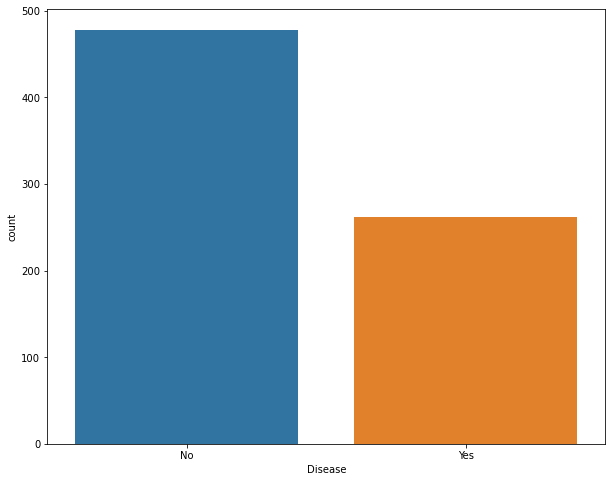

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')
plt.savefig('disease_plot.png', format='png', dpi=300)


we can see, the number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones.

## Initial Analysis of the Reason for Absence

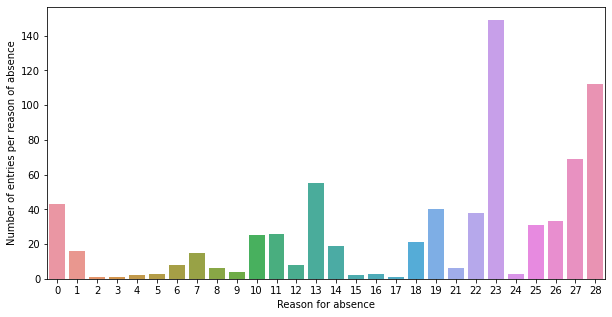

In [13]:
# get the number of entries for each reason for absence
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=preprocessed_data, x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")
plt.savefig('absence_reasons_distribution.png',   format='png', dpi=300)


we can assert that the most frequent reasons for absence are related to

    medical consultations (23),
    dental consultations (28), 
    and physiotherapy (27).

On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of

    the musculoskeletal system and connective tissue (13) 
    and injury, poisoning, and certain other consequences of external causes (19)

## Analysis of Social Drinkers and Smokers

In [14]:
print(preprocessed_data["Social drinker"].value_counts(normalize=True))

print(preprocessed_data["Social smoker"].value_counts(normalize=True))


Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


In [15]:
# precentage of drinker  
drinker =((preprocessed_data[preprocessed_data['Social drinker']=="Yes"]['Social drinker'].count())/preprocessed_data.shape[0])*100
print(f'the  precentage of drinker {drinker}')
# precentage of smoker  
smoker =((preprocessed_data[preprocessed_data['Social smoker']=="Yes"]['Social smoker'].count())/preprocessed_data.shape[0])*100
print(f'the  precentage of smoker {smoker}')

the  precentage of drinker 56.75675675675676
the  precentage of smoker 7.297297297297297


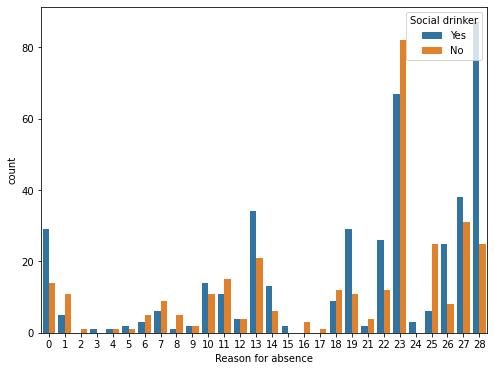

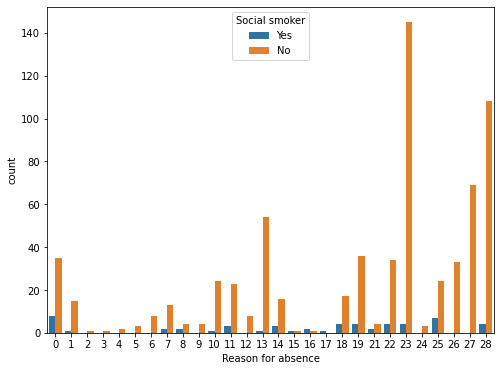

In [16]:
# plot reasons for absence against being a social drinker/smoker
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social drinker", hue_order=["Yes", "No"])
plt.savefig('absence_reasons_drinkers.png', format='png', dpi=300)
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social smoker", hue_order=["Yes", "No"])
plt.savefig('absence_reasons_smokers.png', format='png', dpi=300)


in the absenteeism dataset, 56% of the registered 
employees are drinkers,

while only 7% are smokers

## Identifying Reasons of Absence with Higher Probability Among Drinkers and Smokers

## (conditional probabilities)

In [17]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"].value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"].value_counts(normalize=True)["Yes"]
print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

P(social drinker) = 0.568 | P(social smoker) = 0.073


As you can see, the probability of being a drinker is almost 57%, while the probability of being a smoker is quite low (only 7.3%).

In [18]:
#create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

In [19]:
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"] [smoker_mask].value_counts()/total_entries

In [20]:
absence_drinker_prob


28    0.117568
23    0.090541
27    0.051351
13    0.045946
19    0.039189
0     0.039189
22    0.035135
26    0.033784
10    0.018919
14    0.017568
11    0.014865
18    0.012162
25    0.008108
7     0.008108
1     0.006757
12    0.005405
24    0.004054
6     0.004054
21    0.002703
9     0.002703
15    0.002703
5     0.002703
8     0.001351
4     0.001351
3     0.001351
Name: Reason for absence, dtype: float64

In [21]:
# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob/drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob/smoker_prob


<Figure size 432x288 with 0 Axes>

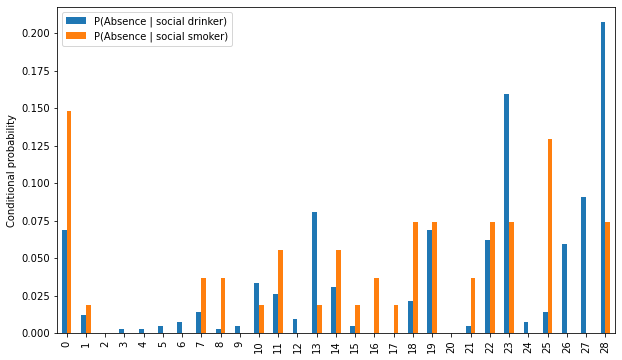

In [22]:
# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")
plt.savefig('conditional_probabilities.png', format='png', dpi=300)

As we can observe from the previous plot, 
the highest reason for absence for 

    drinkers is dental consultations (28),
    followed by medical consultations (23). 
    
Smokers' absences, however, 

    are mostly due to unknown reasons (0)
    and laboratory examinations (25)
    

we can see the reason for absence 

    Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism (3)
    Endocrine, nutritional and metabolic diseases (4)
    Mental and behavioural disorders (5)
    Diseases of the nervous system (6)
    Diseases of the circulatory system (9)
    Diseases of the skin and subcutaneous tissue (12)
    blood donation (24)
    unjustified absence (26)
    physiotherapy (27)
all previous reasons just for drinkers and no one absence with this reasons from smokers .

in other side  we can see the reason for absence

    Certain conditions originating in the perinatal period (16)
    Congenital malformations, deformations and chromosomal abnormalities (17)
    
the previous reasons just for smokers and no one absence with this reasons from drinkers . 


## Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason  

## (Bayes' theorem)


In [23]:
# compute reason for absence probabilities
absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize=True)

In [24]:
# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob
cond_prob_drinker_smoker

,P(social drinker | Absence),P(social smoker | Absence)
0,0.674419,0.186047
1,0.312500,0.062500
2,NaN,NaN
3,1.000000,NaN
4,0.500000,NaN
5,0.666667,NaN
6,0.375000,NaN
7,0.400000,0.133333
8,0.166667,0.333333
9,0.500000,NaN


<Figure size 432x288 with 0 Axes>

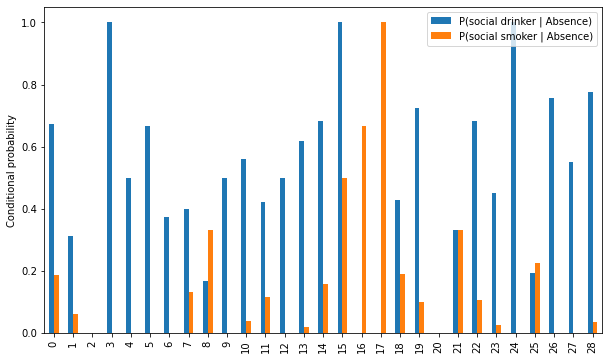

In [25]:
plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")
plt.savefig('conditional_probabilities_drinker_smoker.png',  format='png', dpi=300)

we can see all drinkers are absent for reasons of disease : 

    Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism (3)
    Pregnancy, childbirth and the puerperium (15)
and reason of :
   
     blood donation (24)
     
     
also  all smokers are absent for reasons of disease:

    Congenital malformations, deformations and chromosomal abnormalities(17)

## absenteeism time in hours

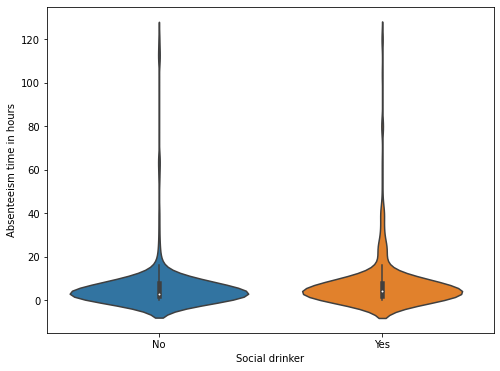

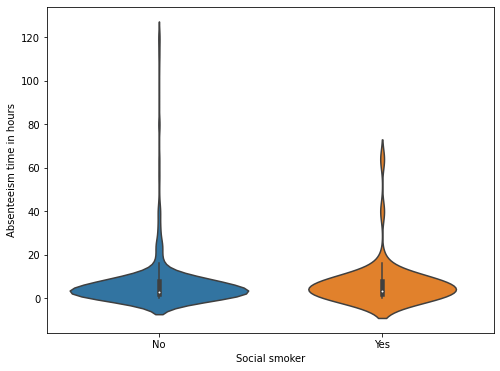

In [26]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours",  data=preprocessed_data, order=["No", "Yes"])
plt.savefig('drinkers_hour_distribution.png',  format='png', dpi=300)
plt.figure(figsize=(8,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", data=preprocessed_data, order=["No", "Yes"])
plt.savefig('smokers_hour_distribution.png', format='png', dpi=300)
           

As you can observe from previous plot , despite some differences in the outliers 
between smokers and non-smokers, there is no substantial difference in the 
distribution of absenteeism hours in drinkers and smokers

## hypothesis test 

To assess this statement in a rigorous statistical way, perform hypothesis testing 
on the absenteeism hours (with a null hypothesis stating that the average 
absenteeism time in hours is the same for drinkers and non-drinkers

if p value <= 0.05 we reject (alternative hypothesis ) .

if p_value > 0.05 we can't reject (null hypothesis).

In [27]:
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"
# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]},p-value: {drinkers_test[1]}")


Statistic value: 1.7713833295243993,p-value: 0.07690961828294651


#####  p_value > 0.05 we can't reject (null hypothesis)

In [28]:
# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}" )

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


#####  p_value > 0.05 we can't reject (null hypothesis)


As you can see, the p-value of both tests is above the critical value of 0.05, which 
means that you cannot reject the null hypothesis. In other words, you cannot 
say that there is a statistically significant difference in the absenteeism hours 
between drinkers (and smokers) and non-drinkers (and non-smokers).
Note that in the previous paragraph, you performed hypothesis tests, with a 
null hypothesis for the average absenteeism hours being equal for drinkers (and 
smokers) and non-drinkers (and non-smokers). Nevertheless, the average hours 
may still be equal, but their distributions may be different

 ##### Kolmogorov-Smirnov

In [29]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)
print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f},pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135,pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


The p-value for the drinkers dataset is lower than the critical 0.05, which is strong 
evidence against the null hypothesis of the two distributions being equal. On the 
other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot 
reject the null hypothesis

## Body Mass Index


The Body Mass Index (BMI) is defined as a person's weight in kilograms, divided by 
the square of their height in meters:

BMI is a universal way to classify people as underweight, healthy weight, 
overweight, and obese, based on tissue mass (muscle, fat, and bone) and height.

##### we can build the four categories (underweight, healthy weight, overweight, and obese) based on the BMI values

In [30]:
"""
define function for computing the BMI category, based on BMI value
"""
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category
# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"].apply(get_bmi_category)

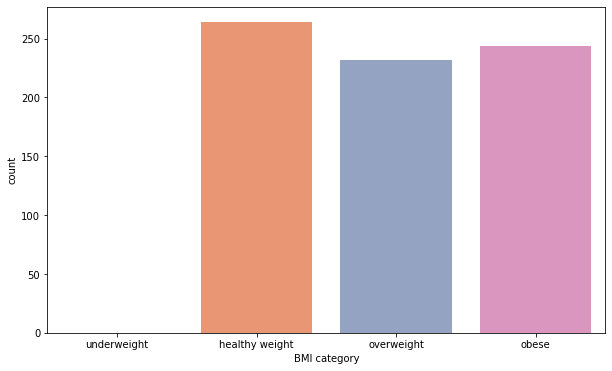

In [31]:
# plot number of entries for each category
plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data, x='BMI category', \
              order=["underweight", "healthy weight",  "overweight", "obese"],palette="Set2")
plt.savefig('bmi_categories.png', format='png', dpi=300)

We can see that no entries for the underweight category are present, with the 
data being almost uniformly distributed among the remaining three categories. Of 
course, this is an alarming indicator, as more than 60% of the employees are either 
overweight or obese.

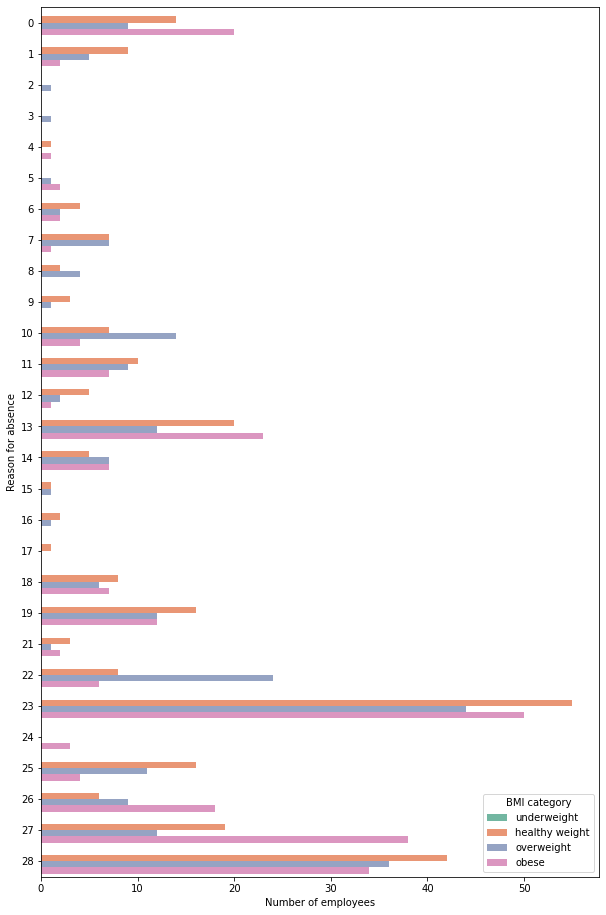

In [32]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=preprocessed_data,y="Reason for absence", hue="BMI category", 
                   hue_order=["underweight", "healthy weight", "overweight", "obese"], palette="Set2")
ax.set_xlabel("Number of employees")
plt.savefig('reasons_bmi.png', format='png', dpi=300)

unfortunately, no clear pattern arises from the preceding plot. In other words, for 
each reason for absence, an (almost) equal number of employees with different body 
mass indexes are present.

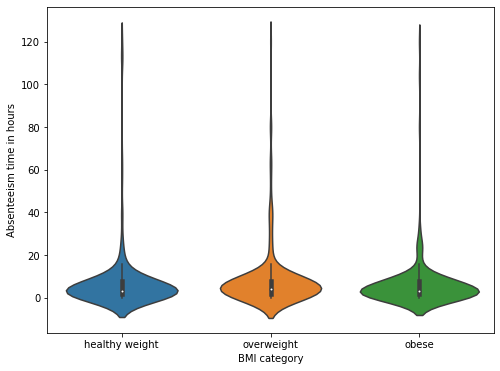

In [33]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", y="Absenteeism time in hours", 
               data=preprocessed_data, order=["healthy weight", "overweight", "obese"])
plt.savefig('bmi_hour_distribution.png', format='png')

 no evidence states that BMI and 
obesity levels influence the employees' absenteeism

<AxesSubplot:xlabel='BMI category', ylabel='count'>

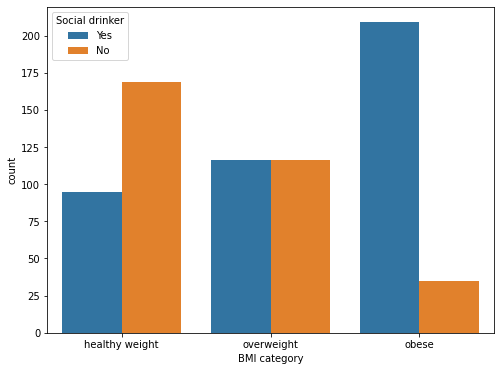

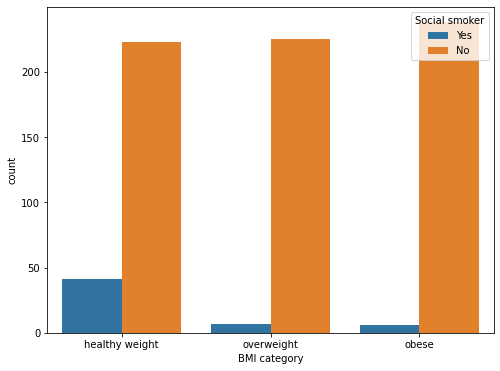

In [34]:
# plot reasons for absence against being a social drinker/smoker
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="BMI category" ,hue="Social drinker", hue_order=["Yes", "No"],
              order=["healthy weight", "overweight", "obese"])

plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="BMI category", hue="Social smoker", hue_order=["Yes", "No"],
             order=["healthy weight", "overweight", "obese"])


we can see  in the first plot previous more than 200 person have  obese and drinkers.

### Age and Education Factors


 

Age and education may also influence employees' absenteeism. For instance, older 
employees might need more frequent medical treatment, while employees with 
higher education degrees, covering positions of higher responsibility, might be less 
prone to being absent

### 1- Age

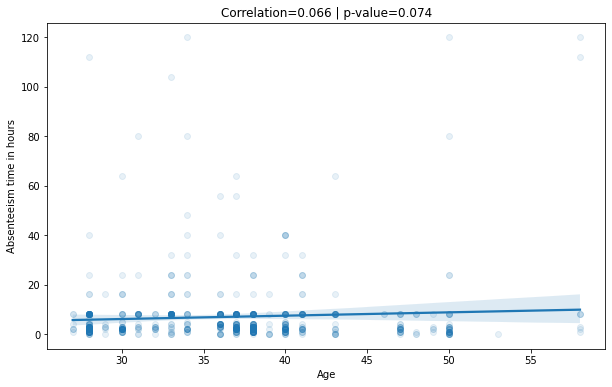

In [35]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data["Age"], preprocessed_data["Absenteeism time in hours"])
"""
create regression plot and add correlation coefficient in the title
"""
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours",data=preprocessed_data, scatter_kws={"alpha":0.1})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}")
plt.savefig('correlation_age_hours.png', format='png', dpi=300)

As we can observe from the resulting plot, no significant pattern occurs. Furthermore, 
the correlation coefficient is extremely small (0.066), and its p-value is above the 
threshold of 0.05, which is an additional indicator that no relationship is present 
between the Age and Absenteeism time in hours features

We can also check whether age has some impact on the reason for absence

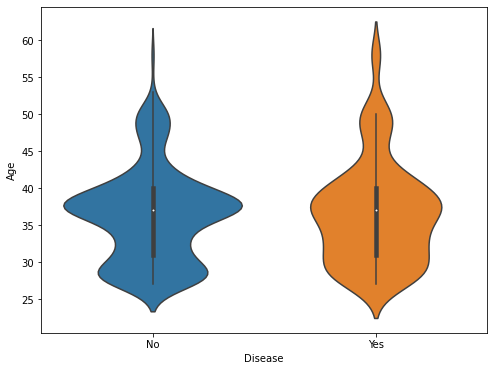

In [36]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)
plt.savefig('exercise_204_age_disease.png', format='png', dpi=300)

In [53]:
"""
get Age entries for employees with Disease == Yes and Disease == No
"""
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]
# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")
# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


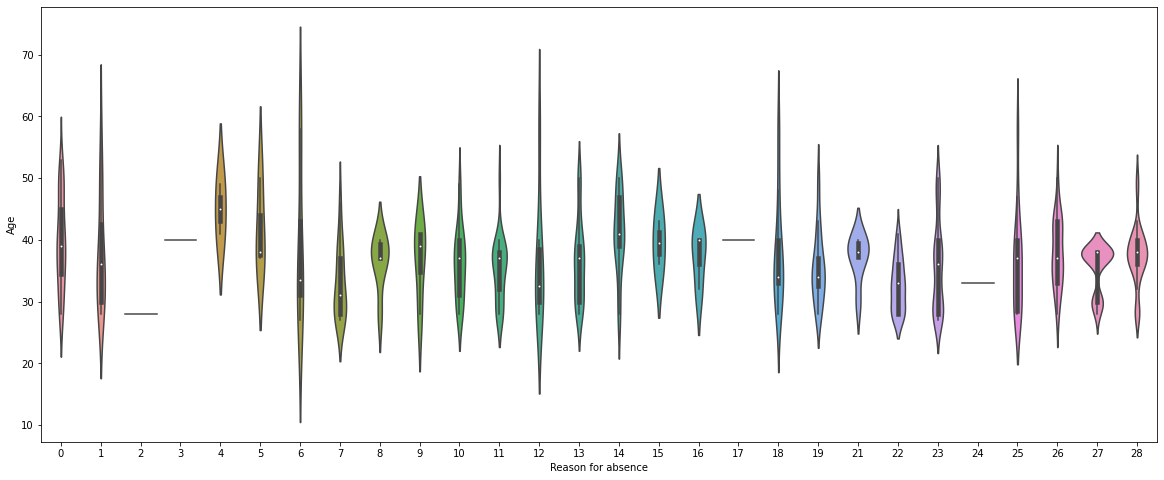

In [38]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age",data=preprocessed_data)
plt.savefig('exercise_204_age_reason.png', format='png')

In light of the previously performed analysis, you can conclude that age has no impact 
on the employees' absenteeism

### 2- Education

In [39]:
# compute percentage of employees per education level
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
counts = preprocessed_data["Education"].value_counts()
percentages = preprocessed_data["Education"].value_counts(normalize=True)
for educ_type in education_types:
    print(f"Education type: {educ_type:12s} | Counts : {counts[educ_type]:6.0f}  | Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school  | Counts :    611  | Percentage: 82.6
Education type: graduate     | Counts :     46  | Percentage:  6.2
Education type: postgraduate | Counts :     79  | Percentage: 10.7
Education type: master_phd   | Counts :      4  | Percentage:  0.5


u can see that most of the employees in the data have a high school degree 
(82.6%), which means that the data is highly biased toward these employees.

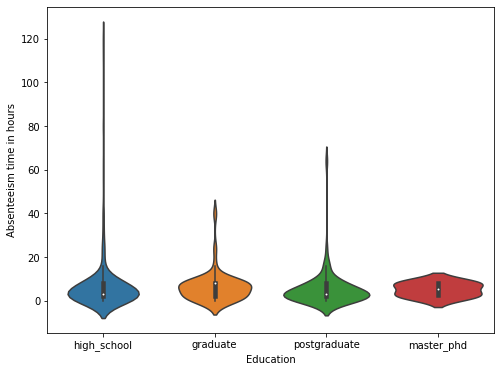

In [40]:
# distribution of absence hours, based on education level
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="Absenteeism time in hours",   data=preprocessed_data,
               order=["high_school", "graduate", "postgraduate", "master_phd"])
plt.savefig('exercise_205_education_hours.png', format='png')

In [41]:
# compute mean and standard deviation of absence hours
education_types = ["high_school", "graduate",   "postgraduate", "master_phd"]
for educ_type in education_types:
    mask = preprocessed_data["Education"] == educ_type
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

Education type: high_school  | Mean : 7.190 | Stddev: 14.259
Education type: graduate     | Mean : 6.391 | Stddev: 6.754
Education type: postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: master_phd   | Mean : 5.250 | Stddev: 3.202


You can see that both the mean and standard deviation of the hours of absence 
are decreasing, meaning that highly educated employees tend to have shorter 
absences. Of course, a higher degree of education is not a cause for such a 
phenomenon and is more of an indication of it. 

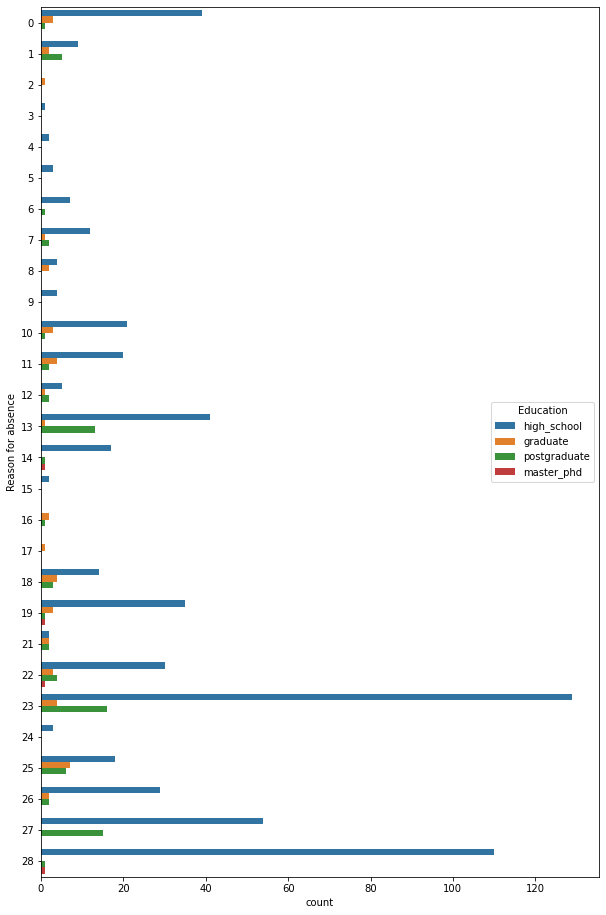

In [42]:
# plot reason for absence, based on education level
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence",
              hue="Education", 
              hue_order=["high_school", "graduate",  "postgraduate", "master_phd"])
plt.savefig('exercise_205_education_reason.png', format='png')


In [43]:
"""
define threshold for extreme hours of absenteeism and get total number 
of entries
"""
threshold = 40
total_entries = len(preprocessed_data)
# find entries with Education == high_school
high_school_mask = preprocessed_data["Education"] == "high_school"
# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data ["Absenteeism time in hours"] > threshold
# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask])/total_entries
# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) /total_entries


In [44]:
"""
compute probability of having high school and being absent for more 
than "threshold" hours
"""
prob_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask])/total_entries

"""
compute probability of having more than high school and being absent 
for more than "threshold" hours
"""

prob_extreme_graduate = len(preprocessed_data[~high_school_mask & extreme_mask])/total_entries
# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school /prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate
print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}")
preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


From the preceding computations, we can see that the probability of having an 
absence of more than 40 hours for employees with a high school education degree 
is 2.29%, which is approximately three times greater than the same probability for 
employees with a university degree (0.78%)

## Transportation Costs and Distance to Work Factors


Two possible indicators for absenteeism may also be the distance between home and 
work (the Distance from Residence to Work column) and transportation 
costs (the Transportation expense column). Employees who have to travel 
longer, or whose costs for commuting to work are high, might be more prone 
to absenteeism

<Figure size 720x432 with 0 Axes>

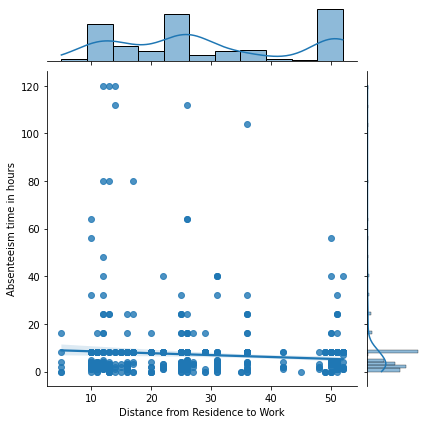

<Figure size 720x432 with 0 Axes>

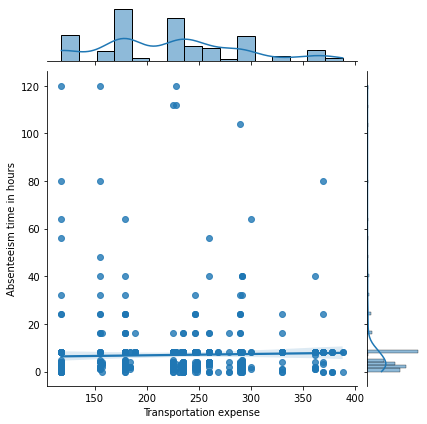

In [46]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", y="Absenteeism time in hours", 
              data=preprocessed_data, kind="reg")
plt.savefig('distance_vs_hours.png', format='png')
plt.figure(figsize=(10, 6))
sns.jointplot(x="Transportation expense",  y="Absenteeism time in hours", 
              data=preprocessed_data, kind="reg")
plt.savefig('costs_vs_hours.png', format='png')


As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the 
absenteeism time in hours is heavily right-skewed. This makes the comparison 
between the variables difficult to interpret. One solution to this problem is to 
transform the data into something close to a normal distribution. A handy way to 
perform this transformation is to use the Box-Cox or Yeo-Johnson transformations. 
Both are defined as a family of functions, depending on a parameter λ, under which 
the transformed data is as close to normal as possible. 


### box-cox and yeo-johnson

In Python, both transformations can be found in the scipy.stats module (in the 
boxcox() and yeojohnson() functions, respectively).

<Figure size 720x432 with 0 Axes>

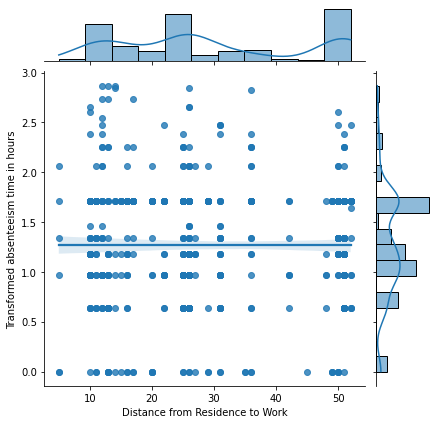

<Figure size 720x432 with 0 Axes>

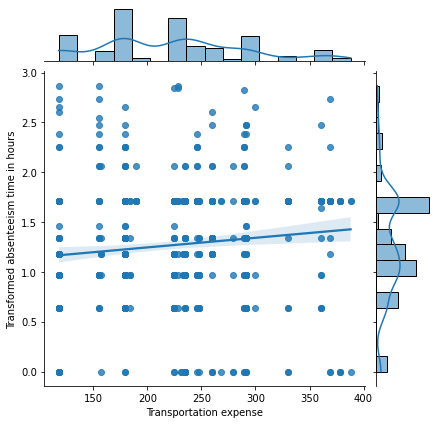

In [52]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")
plt.savefig('distance_vs_hours_transformed.png', format='png')
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense",  "Transformed absenteeism time in hours")
plt.savefig('costs_vs_hours_transformed.png', format='png')


<Figure size 720x432 with 0 Axes>

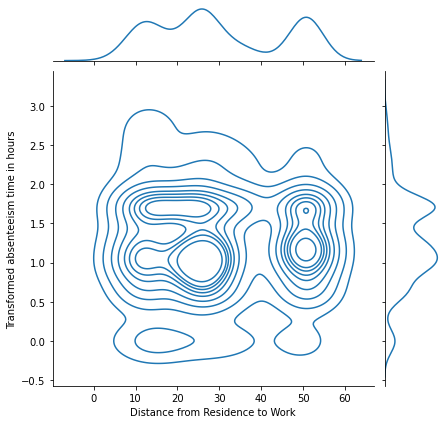

<Figure size 720x432 with 0 Axes>

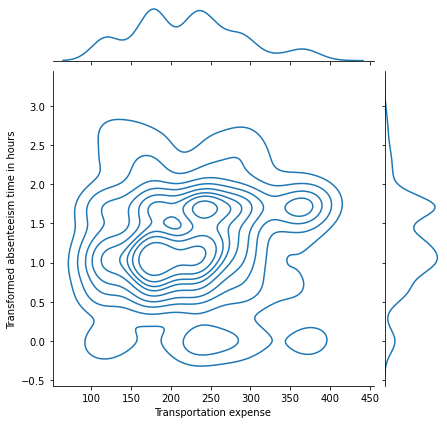

In [50]:
# produce KDE plots 
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")
plt.savefig('distance_vs_hours_transformed_kde.png', format='png')
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde")
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")
plt.savefig('costs_vs_hours_transformed_kde.png', format='png')


 we can also see that the regression line between the variables 
is almost flat for the Distance from Residence to Work column (which 
is a clear indicator of zero correlation) but has a slight upward slope for the 
Transportation Expense column. Therefore, we can expect a small 
positive correlation

In [51]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


These results confirm our observation, stating that there is a slight positive 
correlation between Transportation expense and Absenteeism time 
in hours

## Temporal Factors


Factors such as day of the week and month may also be indicators for absenteeism. 
For instance, employees might prefer to have their medical examinations on Friday 
when the workload is lower, and it is closer to the weekend. In this section, we will 
analyze the impact of the Day of the week and Month of absence columns, 
and their impact on the employees' absenteeism.

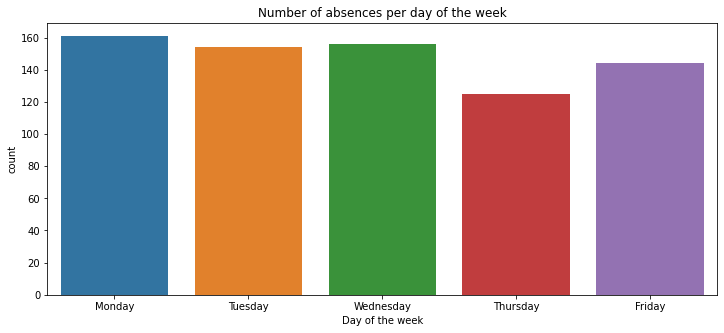

In [57]:
# count entries per day of the week 
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Day of the week', 
                   order=["Monday", "Tuesday",  "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")
plt.savefig('dow_counts.png', format='png', dpi=300)


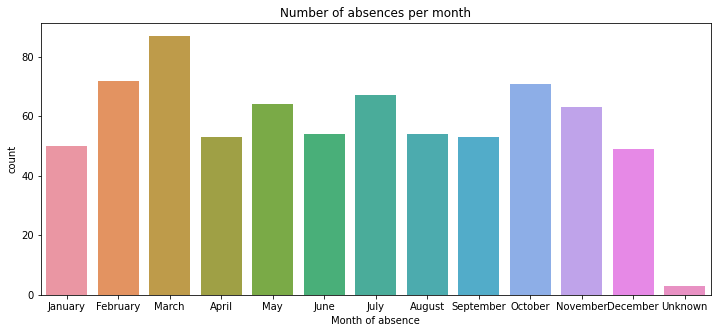

In [56]:
# count entries per month

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Month of absence', 
                    order=["January", "February", "March", "April", "May", "June", 
                           "July", "August", "September", "October", "November", "December", "Unknown"])
ax.set_title("Number of absences per month")
plt.savefig('month_counts.png', format='png', dpi=300)

From the preceding plots, we can't really see a substantial difference between 
the different days of the week or months. It seems that fewer absences occur on 
Thursday, while the month with the most absences is March, but it is hard to say that 
the difference is significant.
Now, let's focus on the distribution of absence hours among the days of the week and 
the months of the year

### Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

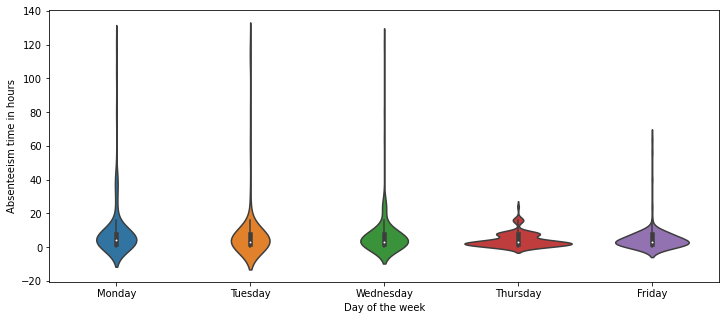

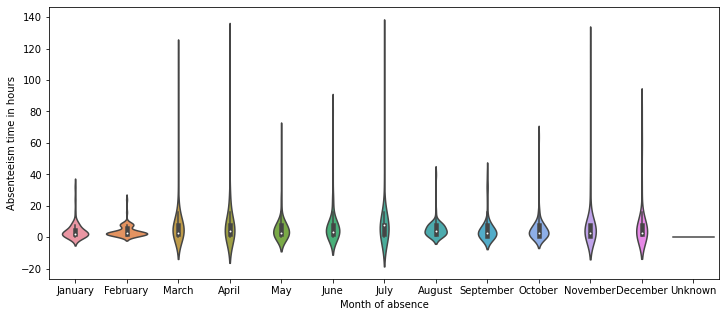

In [58]:
# analyze average distribution of absence hours 
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", y="Absenteeism time in hours", data=preprocessed_data, 
               order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.savefig('exercise_206_dow_hours.png',format='png', dpi=300)
plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", y="Absenteeism time in hours",data=preprocessed_data, 
               order=["January", "February", "March", "April", "May", "June", "July",
                        "August", "September", "October", "November", "December", "Unknown"])
plt.savefig('exercise_206_month_hours.png',  format='png', dpi=300)

In [59]:
"""
compute mean and standard deviation of absence hours per day of the 
week
"""
dows = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")


Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


In [61]:
"""
compute mean and standard deviation of absence hours per day of the 
month
"""
months = ["January","February","March","April","May","June","July", "August", "September", "October","November","December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")


Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


Observe that the average duration of the absences is slightly shorter on 
Thursday (4.424 hours), while absences during July have the longest average 
duration (10.955 hours). To determine whether these values are statistically 
significant—that is, whether there is a statistically significant difference regarding 
the rest of the days/months

In [63]:
# perform statistical test for avg duration difference
thursday_mask = preprocessed_data ["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"
thursday_data = preprocessed_data["Absenteeism time in hours"][thursday_mask]
no_thursday_data = preprocessed_data ["Absenteeism time in hours"][~thursday_mask]
july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]
thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)
print(f"Thursday test result: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}")


Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


<AxesSubplot:>

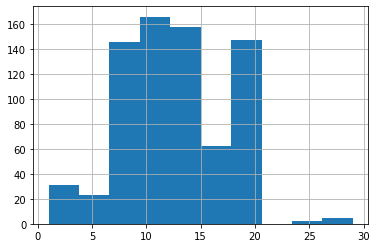

In [64]:
preprocessed_data.head().T
preprocessed_data["Service time"].hist()

 ## Analyzing the Service Time and Son Columns

In [75]:
from scipy import stats
servise_time = stats.kstest(preprocessed_data["Service time"],  "norm")

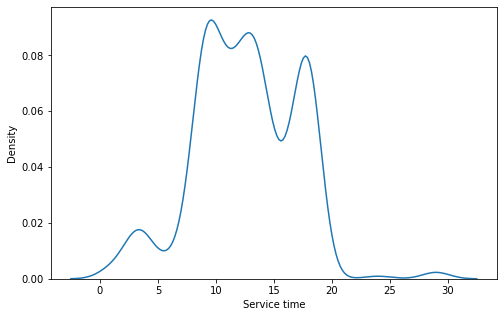

In [79]:
# kernel density estimation plot
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(preprocessed_data["Service time"])

plt.savefig('Service time.png', format='png', dpi=300)

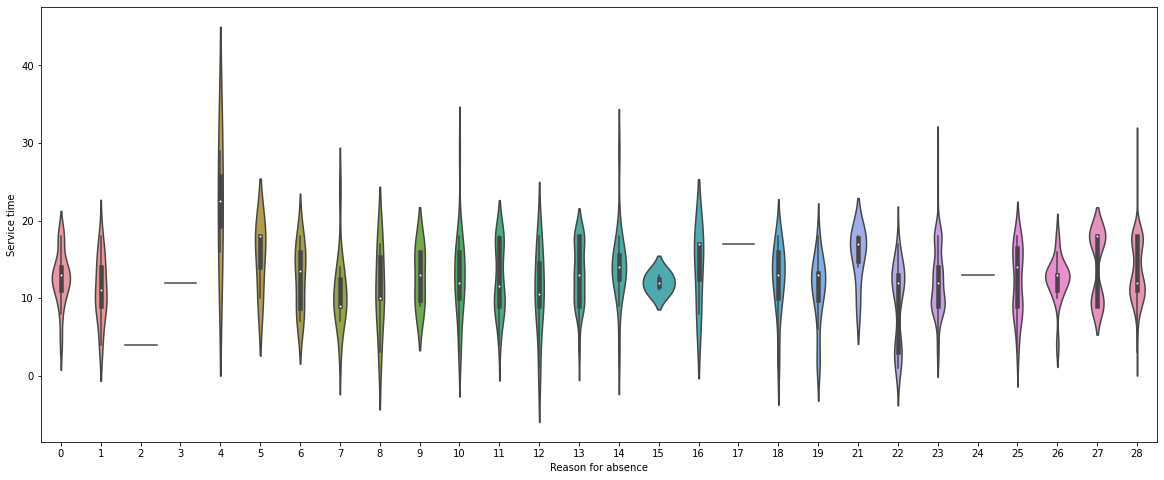

In [82]:
# violin plot of reason for absence vs Service time
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Service time",data=preprocessed_data)
plt.savefig('Service time_reason.png', format='png')

<Figure size 720x432 with 0 Axes>

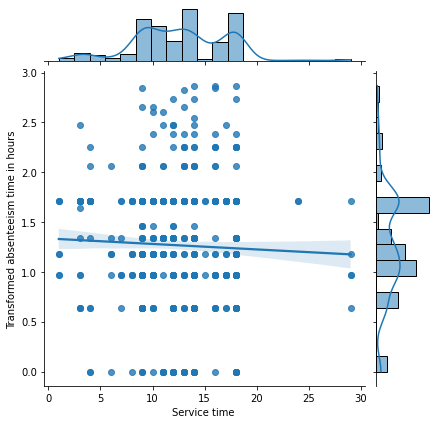

In [83]:
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
serviceTime = preprocessed_data["Service time"]
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=serviceTime, y=hours[0], kind="reg")
ax.set_axis_labels("Service time ","Transformed absenteeism time in hours")
plt.savefig('Service time_vs_hours_transformed.png', format='png')


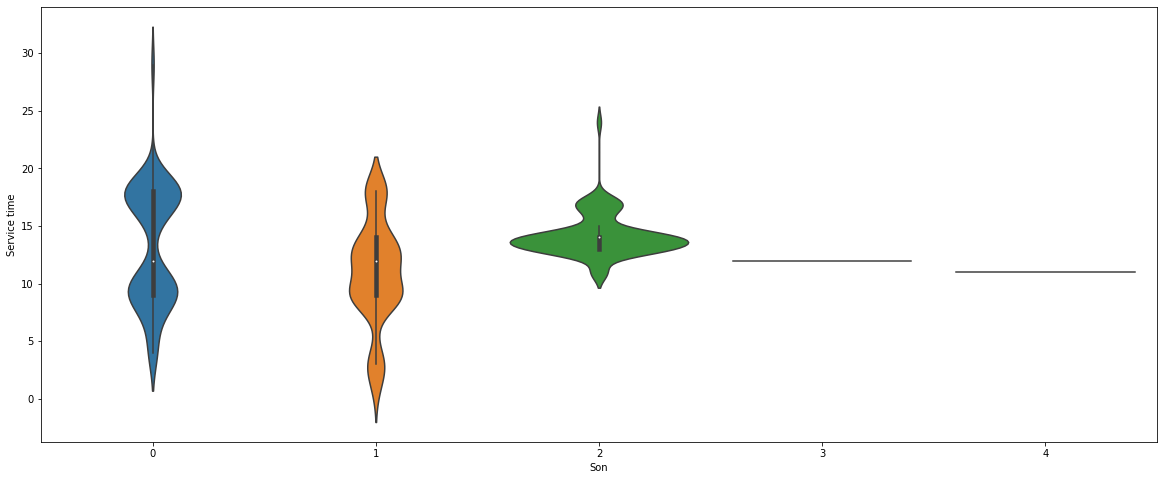

In [86]:
# violin plot of "Service time" vs numbers of son 
plt.figure(figsize=(20,8))
sns.violinplot(x="Son", y="Service time",data=preprocessed_data)
plt.savefig('hours_son.png', format='png')

From this analysis, we can infer that the number of absence hours for employees 
with a greater number of children lies in the range of 10-15 hours. Employees with 
less than three children appear to be absent in a varying range of 1-20 hours. To 
be specific, employees with no children still have a varying number of absent hours 
within the range of 10-15 hours, owing to other reasons, which now opens up a new 
area of analysis. On the contrary, employees with one child are absent only for an 
average of 5 hours. Employees with two children have an average of 15-25 absent 
hours, which could be analyzed further

Thus, we have successfully drawn measurable conclusions to help us understand 
employee behavior in an organization to tackle unregulated absenteeism and take 
necessary measures to ensure the optimal utilization of human resources.